In [1]:
import tensorflow as tf

C:\Users\jeremy.zheren\AppData\Roaming\Python\Python36\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
m1 = tf.constant([[3,3]])
m2 = tf.constant([[2],[3]])

In [4]:
product = tf.matmul(m1, m2)

In [7]:
print(product)

Tensor("MatMul:0", shape=(1, 1), dtype=int32)


In [11]:
with tf.Session() as sess:
    result = sess.run(product)

In [15]:
# variable
x = tf.Variable([1,2])
a = tf.constant([3,3])

sub = tf.subtract(x,a)
add = tf.add(x,a)

# variables must be initialized
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print(sess.run(sub))
    print(sess.run(add))

[-2 -1]
[4 5]


In [2]:
state = tf.Variable(0, name = 'counter')
new_value = tf.add(state, 1)
update = tf.assign(state, new_value)
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(state))
    for _ in range(5):
        sess.run(update)
        print(sess.run(state))

0
1
2
3
4
5


In [18]:
# fetch (run multiple ops)
input1 = tf.constant(3.0)
input2 = tf.constant(2.0)
input3 = tf.constant(5.0)


add = tf.add(input2, input3)
mul = tf.multiply(input1, add)

with tf.Session() as sess:
    result = sess.run([mul, add])
    print(result)



[21.0, 7.0]


In [22]:
# Feed
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)
output = tf.multiply(input1, input2)
with tf.Session() as sess:
    print(sess.run(output, feed_dict={input1:[7.0], input2:[2.0]}))

[14.]


In [25]:
import numpy as np
x_data = np.random.rand(100)
y_data = x_data * 0.1 + 0.2

# create a linear model
b = tf.Variable(0.)
k = tf.Variable(0.)
y = k * x_data + b

# least square
loss = tf.reduce_mean(tf.square(y_data - y))

# def a gradient descent optimizer
optimizer = tf.train.GradientDescentOptimizer(0.2)

# minimize loss
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for step in range(201):
        sess.run(train)
        if step%20 == 0:
            print(step, sess.run([k, b]))
    
    
    




0 [0.055399116, 0.10070596]
20 [0.10470803, 0.19739747]
40 [0.102813415, 0.19844483]
60 [0.1016812, 0.19907068]
80 [0.10100465, 0.19944465]
100 [0.10060036, 0.19966814]
120 [0.10035876, 0.19980168]
140 [0.10021439, 0.1998815]
160 [0.10012812, 0.19992918]
180 [0.10007656, 0.19995767]
200 [0.100045756, 0.1999747]


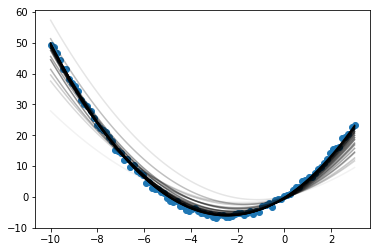

In [54]:
import numpy as np
import matplotlib.pyplot as plt

plt.ion()
n_observations = 100
fig, ax = plt.subplots(1, 1)
xs = np.linspace(-10, 3, n_observations)
ys = xs * xs + 5 * xs + np.random.uniform(-1, 1, n_observations)
ax.scatter(xs , ys)
plt.draw()

p_x = tf.placeholder(tf.float32)
p_y = tf.placeholder(tf.float32)
y_pred = tf.Variable(tf.random_normal([1]), name='bias')
lst_w = []
for pow_i in range(1, 3):
    w = tf.Variable(tf.random_normal([1]), name = 'weight_{0}'.format(pow_i))
    y_pred = tf.add(tf.multiply(tf.pow(p_x, pow_i), w), y_pred)
    lst_w.append(w)
    
loss = tf.reduce_sum(tf.pow(y_pred - p_y, 2)) / (n_observations - 1)
# loss = tf.add(loss, tf.multiply(1e-6, tf.global_norm(lst_w)))

optimizer = tf.train.AdamOptimizer(0.2).minimize(loss)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    n_epoch = 100
    for i in range(n_epoch):
        sess.run(optimizer, feed_dict={p_x: xs, p_y: ys})
#         for (_x, _y) in zip(xs, ys):
#             sess.run(optimizer, feed_dict={p_x: _x, p_y: _y})
        
        training_loss = sess.run(loss, feed_dict={p_x: xs, p_y: ys})
        if i % 5 == 0:
                ax.plot(xs, y_pred.eval(
                    feed_dict={p_x: xs}, session=sess),
                        'k', alpha=i/n_epoch)
                plt.draw()



In [50]:
tf.random_normal([1])

<tf.Tensor 'random_normal_140:0' shape=(1,) dtype=float32>